In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt
import time

In [2]:
# without making a copy
def hybridisation_no_selection_OptSpeed_1(P1,P2,N,seedValue):
    rng = np.random.default_rng(seedValue)
    G = 1 #number of generations
    D = P1.shape[0]
    np.place(P1,P1 == 1,rng.binomial(1,0.5,[D,N])*2)
    np.place(P2,P2 == 1,rng.binomial(1,0.5,[D,N])*2)
    F = np.matrix((P1 + P2)/2)

    while 1 in F:
        # sample two parental populations from the new population with replacement
        b1 = rng.integers(low=0,high=N,size=N)
        S1 = np.zeros([D,1])
        for i in b1:
            s = F[:,i]
            S1 = np.concatenate((S1,s),axis=1)
        S1 = np.delete(S1,0,1)
        b2 = rng.integers(low=0,high=N,size=N)
        # sample from the new population with replacement
        S2 = np.zeros([D,1])
        for i in b2:
            s = F[:,i]
            S2 = np.concatenate((S2,s),axis=1)
        S2 = np.delete(S2,0,1)
        # a new hybridisation
        np.place(S1,S1 == 1,rng.binomial(1,0.5,[D,N])*2)
        np.place(S2,S2 == 1,rng.binomial(1,0.5,[D,N])*2)
        F = (S1 + S2)/2
        G += 1
        #print(f"F {G}")
        #print(F)
    H = np.mean(F)/2
    return F, G, H

In [3]:
D = 5; N = 10; n = 5
rng = np.random.default_rng()
P1 = np.zeros([D,N])
P2 = np.full([D,N],2)
A = rng.integers(low=-2,high=3,size=[n,D])
print(A)
zWT_0 = np.zeros([n,N])
O = np.zeros([n,N])

w = hybridisation_no_selection_OptSpeed_1(P1=np.zeros([D,N]), P2=np.full([D,N],2),N=N, seedValue=None)
print(w)

[[-2  2  0  1 -2]
 [-1  2 -2 -1  1]
 [ 0 -2  1 -2  0]
 [ 1 -2  1  1  2]
 [ 2 -1  2 -1  2]]
(matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), 47, 0.4)


# Time to fixation is proportional to population size

In [8]:
# 100 times repeat averaging, with population size at the increment of 5
D = 10
G_50 = []; H_50 = []
for N_i in range(5,101,5):
    G = []; H = []
    for i in range(100):
        w = hybridisation_no_selection_OptSpeed_1(P1=np.zeros([D,N_i]), P2=np.full([D,N_i],2),N=N_i, seedValue=None)
        F_i = w[0]
        G_i = w[1]
        H_i = w[2]
        G = np.append(G,G_i)
        H = np.append(H,H_i)
    G_50 = np.append(G_50,np.mean(G))
    H_50 = np.append(H_50,np.mean(H))
print(f"mean generation time {G_50}")
print(f"mean hybrid index {H_50}")

mean generation time [ 28.1   63.06  97.21 127.74 168.13 193.82 235.43 285.31 298.59 343.09
 345.52 372.56 421.05 456.69 490.01 534.06 579.4  610.38 646.26 637.43]
mean hybrid index [0.52       0.49       0.50606667 0.5102     0.49704    0.49086667
 0.49497143 0.471      0.50602222 0.50604    0.492      0.48401667
 0.502      0.51101429 0.496      0.5        0.49101176 0.50297778
 0.49701053 0.495     ]


Text(0, 0.5, 'mean generations to fixation')

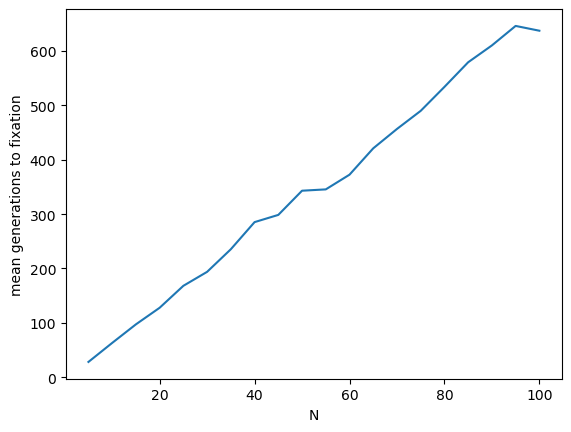

In [12]:
plt.plot(range(5,101,5),G_50)
plt.xlabel("N")
plt.ylabel("time to fixation (G)")

Text(0, 0.5, 'hybridisation index (H)')

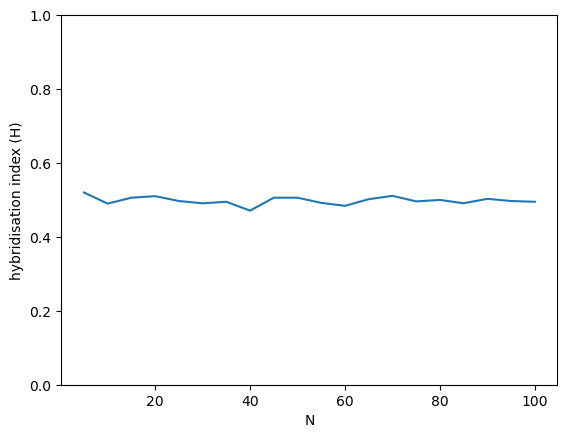

In [14]:
plt.plot(range(5,101,5),H_50)
plt.ylim([0,1])
plt.xlabel("N")
plt.ylabel("hybridisation index (H)")

# Time to fixation increases to number of derive alleles increases

In [14]:
# 100 times repeat averaging, with population size at the increment of 5
tic = time.time()
N = 50
G_vD = []; H_vD = []
for D_i in range(5,101,5):
    G = []; H = []
    for i in range(100):
        w = hybridisation_no_selection_OptSpeed_1(P1=np.zeros([D_i,N]), P2=np.full([D_i,N],2),N=N, seedValue=None)
        F_i = w[0]
        G_i = w[1]
        H_i = w[2]
        G = np.append(G,G_i)
        H = np.append(H,H_i)
    G_vD = np.append(G_vD,np.mean(G))
    H_vD = np.append(H_vD,np.mean(H))
print(f"mean generation time {G_vD}")
print(f"mean hybrid index {H_vD}")

toc = time.time()
print(f"time for execution: {(toc-tic):.3f} seconds")

mean generation time [270.15 318.48 372.29 395.66 430.58 411.78 453.44 439.51 471.15 493.1
 474.04 506.07 517.61 522.15 511.92 534.89 544.38 550.01 574.06 554.94]
mean hybrid index [0.46996    0.50302    0.50936    0.50097    0.5124     0.501
 0.49512571 0.52025    0.50378222 0.497804   0.50290909 0.50100333
 0.50199692 0.50028571 0.49746667 0.5078775  0.50058118 0.49377778
 0.49600211 0.502198  ]
time for execution: 3740.698 seconds


Text(0, 0.5, 'time to fixation (G)')

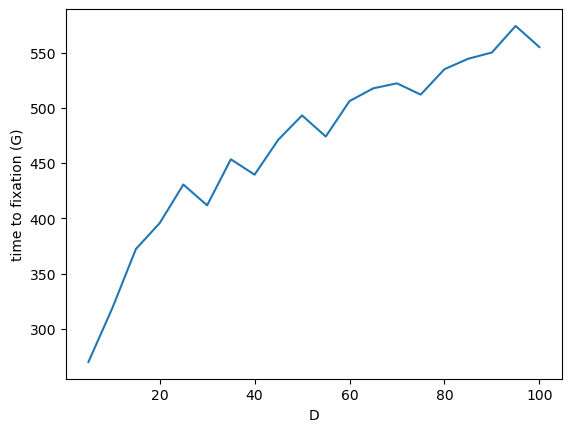

In [15]:
plt.plot(range(5,101,5),G_vD)
plt.xlabel("D")
plt.ylabel("time to fixation (G)")

Text(0, 0.5, 'hybridisation index (H)')

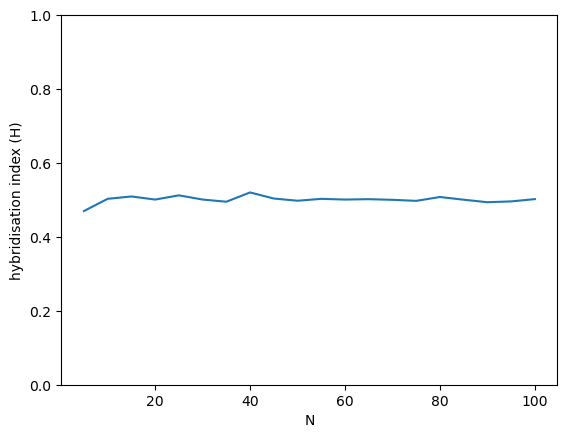

In [16]:
plt.plot(range(5,101,5),H_vD)
plt.ylim([0,1])
plt.xlabel("N")
plt.ylabel("hybridisation index (H)")

# Compare random mating with natural selection proportional to fitness

In [5]:
def fitness_val(der_ale, A, zWT, O):
    z_i = zWT + np.matmul(A, der_ale)
    z_sq = np.square(z_i - O)
    w = np.ravel(np.exp(-np.sum(z_sq, axis=0)))  #np.ravel to flatten matrix into a 1D array
    #log_w = np.log(w)
    return w

# chance of choosing parent proportional to their fitness
def hybridisation_proportional_fitness(P1,P2,N,A,zWT,O,seedValue):
    rng = np.random.default_rng(seedValue)
    G = 1 #number of generations
    D = P1.shape[0]
    P1 = np.matrix(P1); P2 = np.matrix(P2)
    P1_fit = fitness_val(P1,A,zWT,O)
    P1_choice = np.random.choice(range(N),N,replace=True,p=(P1_fit)/sum(P1_fit))
    S1 = np.zeros([D,1])
    for i in P1_choice:
        s = P1[:,i]
        S1 = np.concatenate((S1,s),axis=1)
    S1 = np.delete(S1,0,1)
    P2_fit = fitness_val(P2,A,zWT,O)
    P2_choice = np.random.choice(range(N),N,replace=True,p=(P2_fit)/sum(P2_fit))
    # sample from the new population with replacement
    S2 = np.zeros([D,1])
    for i in P2_choice:
        s = P2[:,i]
        S2 = np.concatenate((S2,s),axis=1)
    S2 = np.delete(S2,0,1)

    np.place(S1,S1 == 1,rng.binomial(1,0.5,[D,N])*2)
    np.place(S2,S2 == 1,rng.binomial(1,0.5,[D,N])*2)
    F = np.matrix((S1 + S2)/2)

    while 1 in F:
        # sample two parental populations from the new population with replacement. Probability proportional to fitness
        F_fit_1 = fitness_val(F,A,zWT,O)
        P1_choice = np.random.choice(range(N),N,replace=True,p=(F_fit_1)/sum(F_fit_1))
        S1 = np.zeros([D,1])
        for i in P1_choice:
            s = F[:,i]
            S1 = np.concatenate((S1,s),axis=1)
        S1 = np.delete(S1,0,1)
        F_fit_2 = fitness_val(F,A,zWT,O)
        P2_choice = np.random.choice(range(N),N,replace=True,p=(F_fit_2)/sum(F_fit_2))
        # sample from the new population with replacement
        S2 = np.zeros([D,1])
        for i in P2_choice:
            s = F[:,i]
            S2 = np.concatenate((S2,s),axis=1)
        S2 = np.delete(S2,0,1)
        # a new hybridisation
        np.place(S1,S1 == 1,rng.binomial(1,0.5,[D,N])*2)
        np.place(S2,S2 == 1,rng.binomial(1,0.5,[D,N])*2)
        F = (S1 + S2)/2
        G += 1
        #print(f"F {G}")
        #print(F)
    H = np.mean(F)/2
    return F, G, H

In [8]:
# 100 times repeat averaging, with population size at the increment of 5
tic = time.time()
D = 10; n = 5
rng = np.random.default_rng(102)
A = rng.integers(low=-2,high=3,size=[n,D])
print(f"A\n{A}")

G_fit = []; H_fit = []
for N_i in range(5,101,5):
    G = []; H = []
    zWT_0 = np.zeros([n,N_i])
    O = np.zeros([n,N_i])
    for i in range(100):
        w = hybridisation_proportional_fitness(P1=np.zeros([D,N_i]), P2=np.full([D,N_i],2),N=N_i,A=A,zWT=zWT_0,O=O, seedValue=None)
        F_i = w[0]
        G_i = w[1]
        H_i = w[2]
        G = np.append(G,G_i)
        H = np.append(H,H_i)
    G_fit = np.append(G_fit,np.mean(G))
    H_fit = np.append(H_fit,np.mean(H))
print(f"mean generation time {G_fit}")
print(f"mean hybrid index {H_fit}")
toc=time.time()
print(f"time of execution: {(toc-tic):.3f} seconds")

A
[[ 0 -2  0  0 -1  2 -1 -1 -2  1]
 [ 1  0 -1  2  2  0  1  2 -2 -1]
 [-2 -2  0 -1  2  1  2  0  0  2]
 [ 1  2  0  2 -2 -2  0  0  2  1]
 [-1  2  1 -2 -1  1  2 -2 -1  1]]



KeyboardInterrupt



In [ ]:
plt.plot(range(5,101,5),G_50,label="without selection")
plt.plot(range(5,101,5),G_fit,label="with selection")
plt.xlabel("N")
plt.ylabel("time to fixation (G)")

In [ ]:
plt.plot(range(5,101,5),H_50,label="without selection")
plt.plot(range(5,101,5),H_fit,label="with selection")
plt.ylim([0,1])
plt.xlabel("N")
plt.ylabel("hybridisation index (H)")

# Hybridisation index represents the proportion of initial P1 and P2 genotypes under neutrality

In [9]:
# change P2 to contain different proportions of 1s.
D = 10; N = 20
P1 = np.zeros([D,N])
# expected H=0.45


a = np.full([D-1,N],2)
b = np.full([1,N],1)
P2 = np.concatenate((a,b),axis=0)
P1 = np.zeros([D,N])
print(np.mean(P1+P2)/4)
#w = hybridisation_no_selection_OptSpeed_1(P1,P2,N,seedValue=None)

0.475


In [3]:
# change P2 to contain different proportions of 1s.
D = 10; N = 20
P1 = np.zeros([D,N])

for i in range(1,N+1):
    a = np.full([D-i,N],2)
    b = np.full([i,N],1)
    P2 = np.concatenate((a,b),axis=0)
    H_exp = np.mean(P1+P2)/4

154


In [11]:
# allele 2 / allele 0 ratio
D = 10; N = 20
rng = np.random.default_rng()

ratio_upper = [0.5,0.4,0.3,0.2,0.1]
P1 = np.zeros([D,N])
G_vary = []; H_vary = []
for r in ratio_upper:
    p2 = rng.binomial(1,r*2,D*N)
    P2 = np.reshape(p2,[D,N])*2
    G = []; H = []
    for i in range(100):
        w = hybridisation_no_selection_OptSpeed_1(P1=np.zeros([D,N]), P2=np.full([D,N],2),N=N, seedValue=None)
        #F_i = w[0]
        G_i = w[1]
        H_i = w[2]
        G = np.append(G,G_i)
        H = np.append(H,H_i)
    G_vary = np.append(G_vary,np.mean(G))
    H_vary = np.append(H_vary,np.mean(H))
print(f"mean generation time {G_vary}")
print(f"mean hybrid index {H_vary}")

mean generation time [133.65 133.84 127.8  124.41 133.5 ]
mean hybrid index [0.49115 0.4892  0.5129  0.50005 0.50985]
